In [39]:
from keras.applications.vgg16 import VGG16,preprocess_input

import keras
#Load the model
model = VGG16()

In [2]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

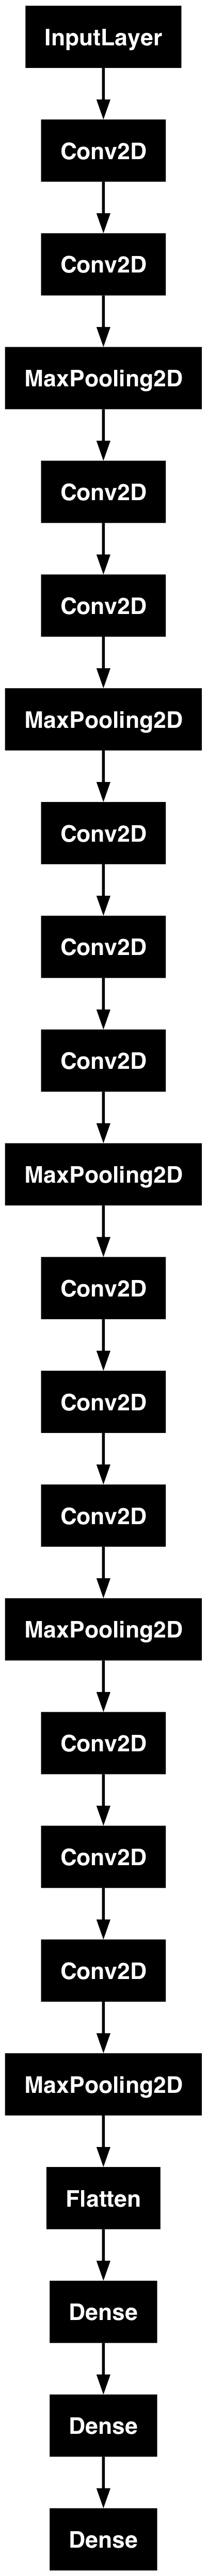

In [5]:
from keras.utils import plot_model

plot_model(model)

In [ ]:
for i in model.layers:
    if 'conv' in i.name:
        filters, biases = i.get_weights()
        print("layer ",i.name, filters.shape)
        

layer  block1_conv1 (3, 3, 3, 64)
layer  block1_conv1 (64,)
layer  block1_conv2 (3, 3, 64, 64)
layer  block1_conv2 (64,)
layer  block2_conv1 (3, 3, 64, 128)
layer  block2_conv1 (128,)
layer  block2_conv2 (3, 3, 128, 128)
layer  block2_conv2 (128,)
layer  block3_conv1 (3, 3, 128, 256)
layer  block3_conv1 (256,)
layer  block3_conv2 (3, 3, 256, 256)
layer  block3_conv2 (256,)
layer  block3_conv3 (3, 3, 256, 256)
layer  block3_conv3 (256,)
layer  block4_conv1 (3, 3, 256, 512)
layer  block4_conv1 (512,)
layer  block4_conv2 (3, 3, 512, 512)
layer  block4_conv2 (512,)
layer  block4_conv3 (3, 3, 512, 512)
layer  block4_conv3 (512,)
layer  block5_conv1 (3, 3, 512, 512)
layer  block5_conv1 (512,)
layer  block5_conv2 (3, 3, 512, 512)
layer  block5_conv2 (512,)
layer  block5_conv3 (3, 3, 512, 512)
layer  block5_conv3 (512,)


In [20]:
filters,biases = model.layers[1].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [24]:
filters.shape

(3, 3, 3, 64)

In [22]:
import matplotlib.pyplot as plt

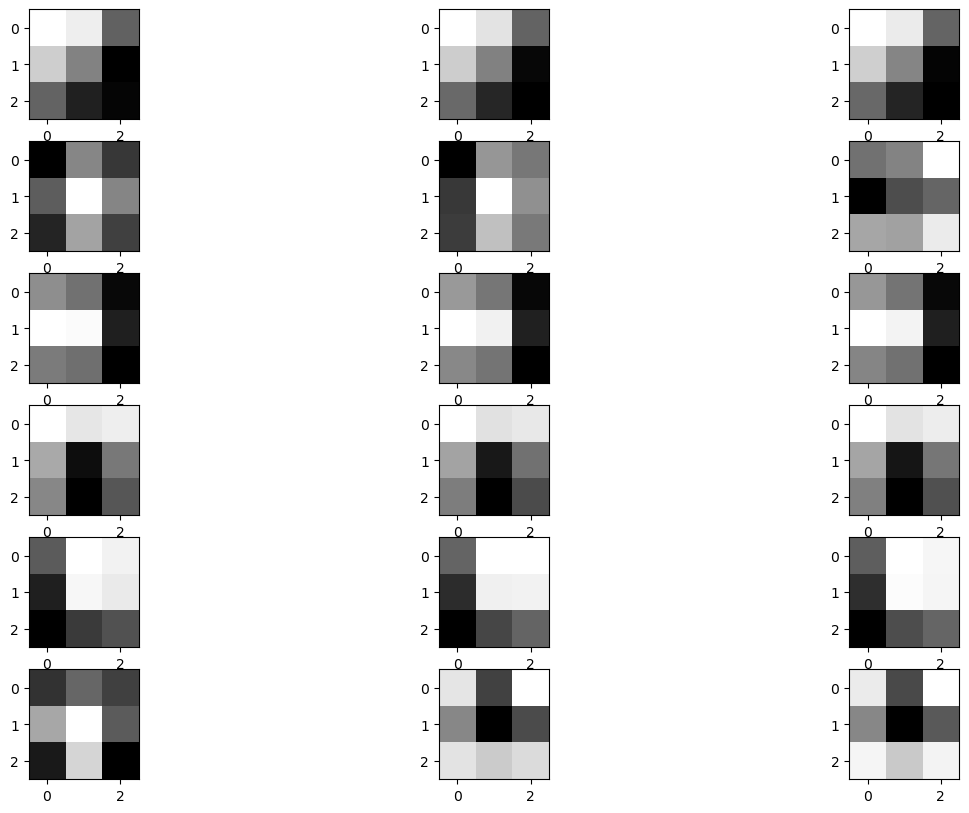

In [26]:
n_filters =6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
plt.show()

In [31]:
from tensorflow.keras.models import Model

In [33]:
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

In [34]:
model2 = VGG16()

In [35]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

In [ ]:
import numpy as np
img_path = '/Users/shivendragupta/Desktop/Deep Learning/Virat_Kohli_during_the_India_vs_Aus_4th_Test_match_at_Narendra_Modi_Stadium_on_09_March_2023.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [48]:
feature_map = model3.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [52]:
import matplotlib.pyplot as plt

# Assuming:
# - `layer_index`: List of layer indices you want to visualize.
# - `feature_map`: List of feature maps corresponding to each layer.

def visualize_feature_maps(layer_index, feature_map):
    for idx, fmap in zip(layer_index, feature_map):
        # Create a figure for each layer
        fig = plt.figure(figsize=(20, 15))
        fig.suptitle(f"Layer_{idx}", fontsize=20)
        
        # Get the number of filters in the feature map
        num_filters = fmap.shape[3]
        
        # Plot each filter's output
        for i in range(num_filters-1):
            plt.subplot(8, 8, i + 1)  # Adjust subplot grid size as needed
            plt.imshow(fmap[0, :, :, i], cmap='gray')
            plt.axis('off')  # Hide axes for cleaner visualization
        
        plt.tight_layout()
        plt.show()

# Example usage:
# visualize_feature_maps(layer_index, feature_map)

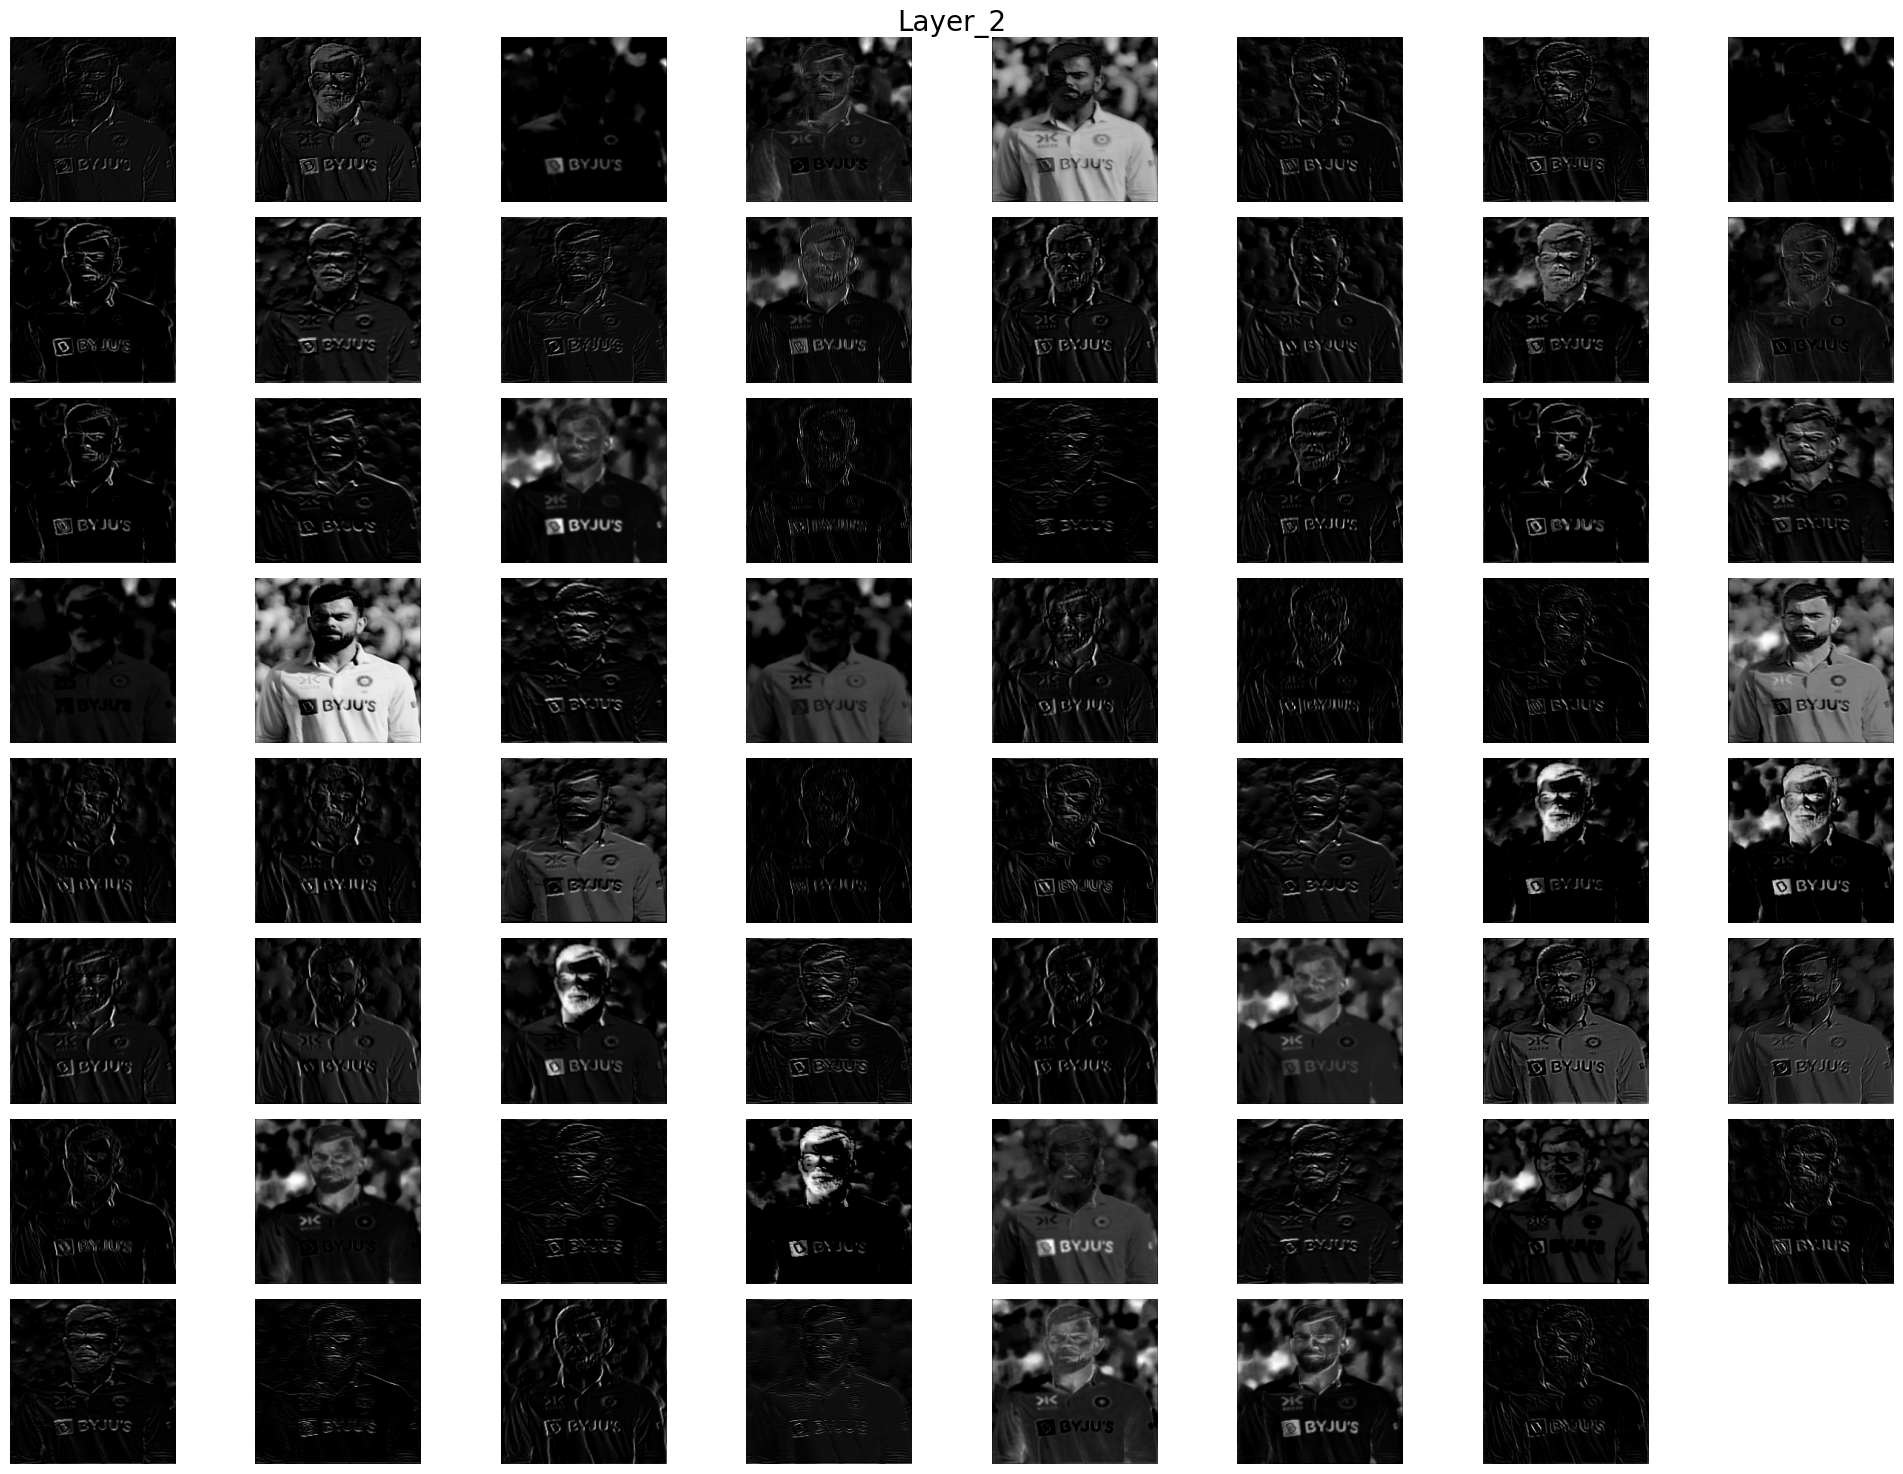

ValueError: num must be an integer with 1 <= num <= 64, not 65

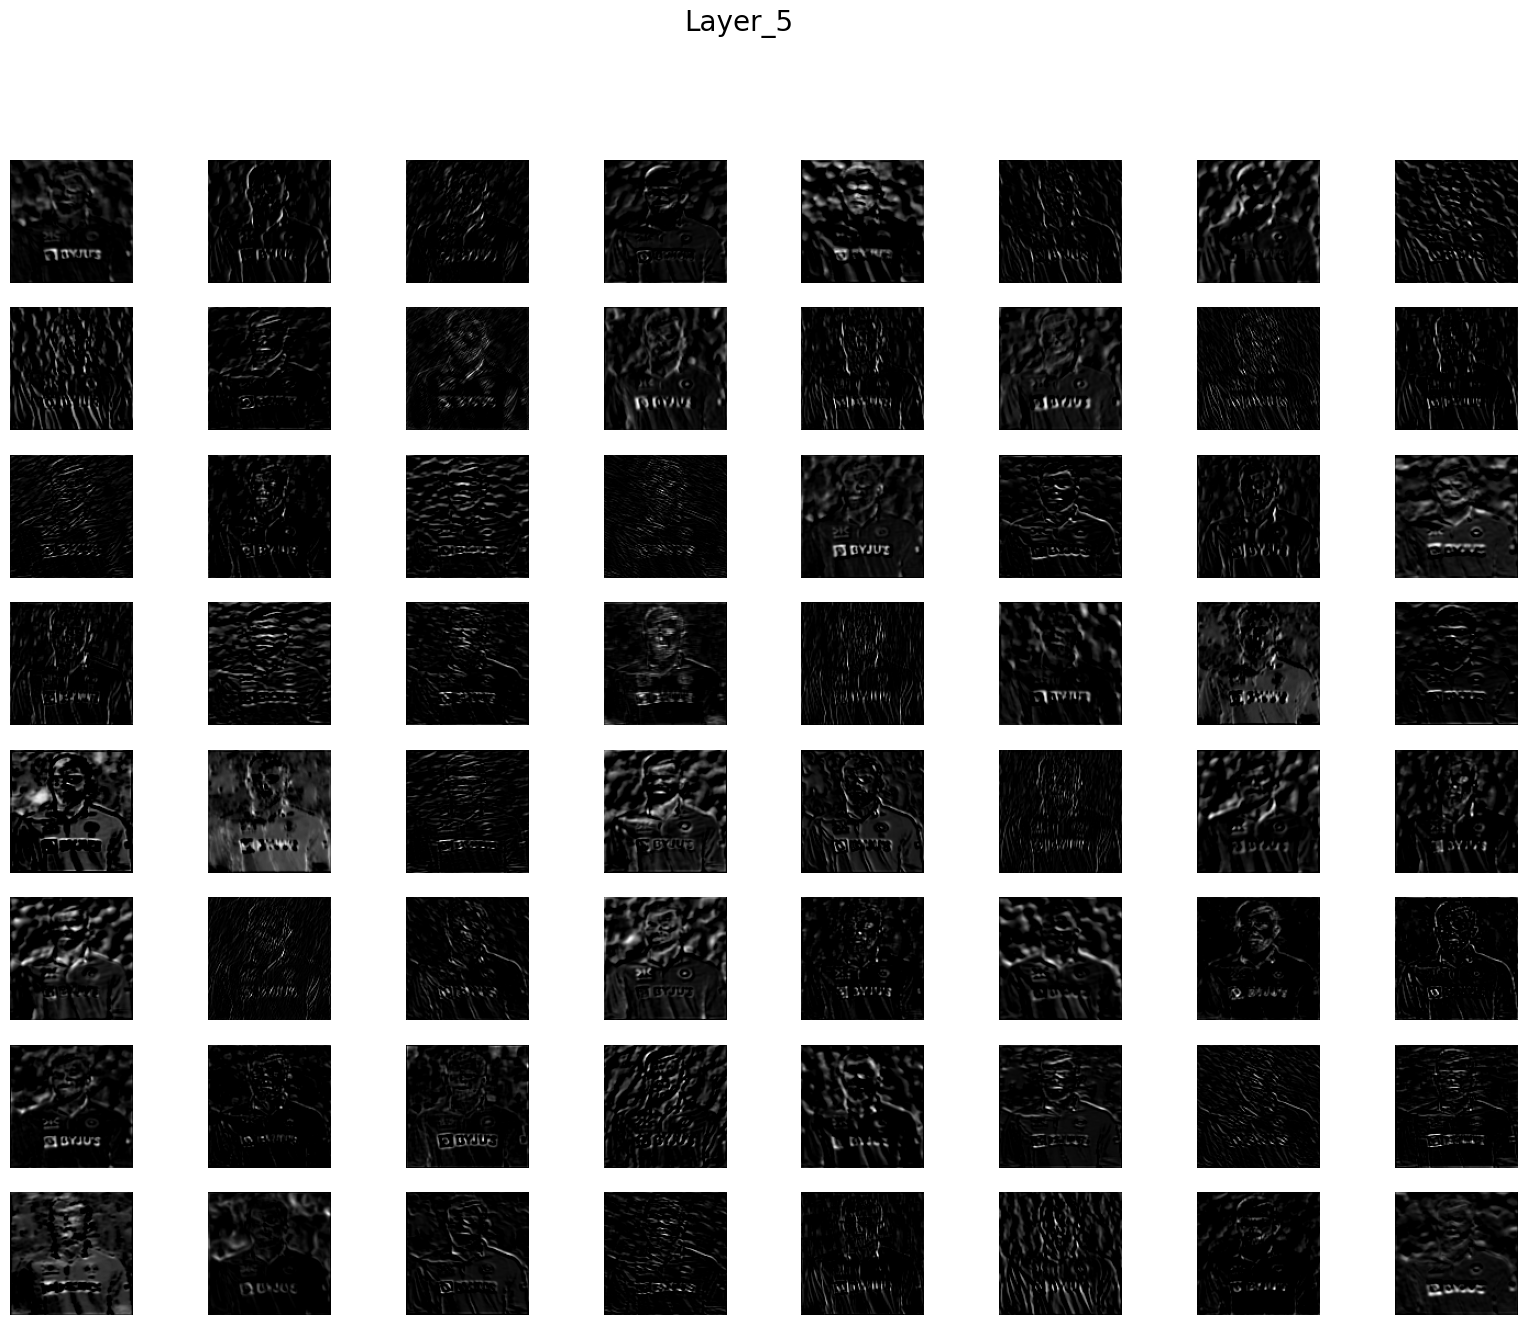

In [53]:
visualize_feature_maps(layer_index, feature_map)